<a href="https://colab.research.google.com/github/Srijavali/Ai-ml-projects-labs-submission/blob/main/23_10_24_Ml_metrics_terms_Data_Augumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=42)
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape)
print("Output variables shape:", dataset.target.shape)

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


In [ ]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label

In [ ]:
def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel)
    rints = rng.integers(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel

In [ ]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

In [ ]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label))
    split1 = rnd < percent
    split2 = rnd >= percent

    split1data = data[split1, :]
    split1label = label[split1]
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 40 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 8244
Number of train samples: 12396
Percent of test data: 39.94186046511628 %


In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  15.907127429805614 %


In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 33.05679642629228 %


In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 99 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 38.73873873873874 %


In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 99.99 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 0.0 %


In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 0.1 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 28.701760051671243 %


In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 33.84279475982533 %


1) How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?


2) How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
```
# Answer
```

According to me if we increase the percentage of the validation set then the percentage of training set may decrease due to, which the model can't get exposed to different patterns in order to generalise it more efficiently and when we decrease the percentage of validation set the percentage of the training set will be more and the model will get explored more to the data which might cause overfitting and as the validation set is low we could'nt able to predict the accuracy of the model more effectively because we can't guess how it predicts when it is exposed to new data as the validation set is low.



3) What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

```
# Answer
```
A) 80% to Training data set and 20% for validation set may work good in many cases but we can choose the different percentages values if we are dealing with large data sets. anyways at last we need to consider the accuracy of the model and check is wheather to decide model is working as the way we expected or it is being overfitted or underfitted.

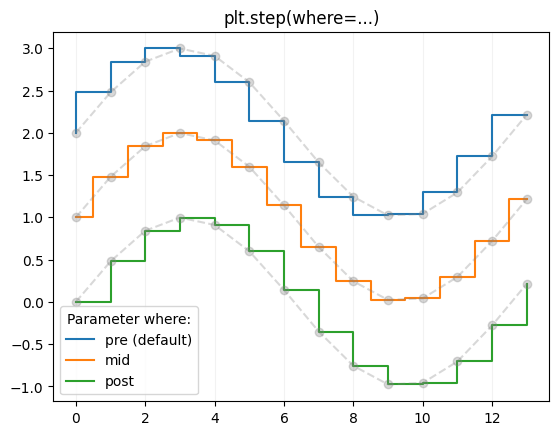

In [ ]:
x = np.arange(14)
y = np.sin(x / 2)

plt.step(x, y + 2, label='pre (default)')
plt.plot(x, y + 2, 'o--', color='grey', alpha=0.3)

plt.step(x, y + 1, where='mid', label='mid')# where is the argument which decides wheather the step need to below the x values or above or inbetween.
plt.plot(x, y + 1, 'o--', color='grey', alpha=0.3)

plt.step(x, y, where='post', label='post')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter where:')
plt.title('plt.step(where=...)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (you can replace this with your own dataset)
data = load_iris() #This is the data set of the flowers which consists of the features like sepal width, sepal length and need to predict the species of the flower
X, y = data.data, data.target
print(data.DESCR)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #This keeps the same way with out changing its sequence

# 1-nearest neighbor
knn_1 = KNeighborsClassifier(n_neighbors=1) #Considers only one nearest point from it
knn_1.fit(X_train, y_train) # it trains the model
y_pred_1 = knn_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Accuracy of 1-nearest neighbor: {accuracy_1:.4f}")

# 3-nearest neighbors
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_3 = knn_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)
print(f"Accuracy of 3-nearest neighbors: {accuracy_3:.4f}")


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [ ]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%") # Iterations are like for splitting the data in the n different ways for cross-validation
testpred = NN(alltraindata, alltrainlabel, testdata) # Here n is the number of iterations
print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 32.45057727852145 %
Test accuracy: 33.84279475982533 %


In [ ]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 40 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 31.547100536815176 %
Test accuracy: 33.84279475982533 %


In [ ]:
1) Does averaging the validation accuracy across multiple splits give more consistent results?
# Answer
A) Yes the averaging of the validation accuracy accross different muitiple splits will give more precise and consistent result.


3) What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

```
# Answer
```
A) yes we do get better estimation with higher iterations but the no of iteration depends on the size of the data set you considered like if you take large data set you need more iterations to decide the estimation of your model is correct or accurate if the data set is small we need to consider less number of iterations usually people consider 10 - 15 iterations for their data set.


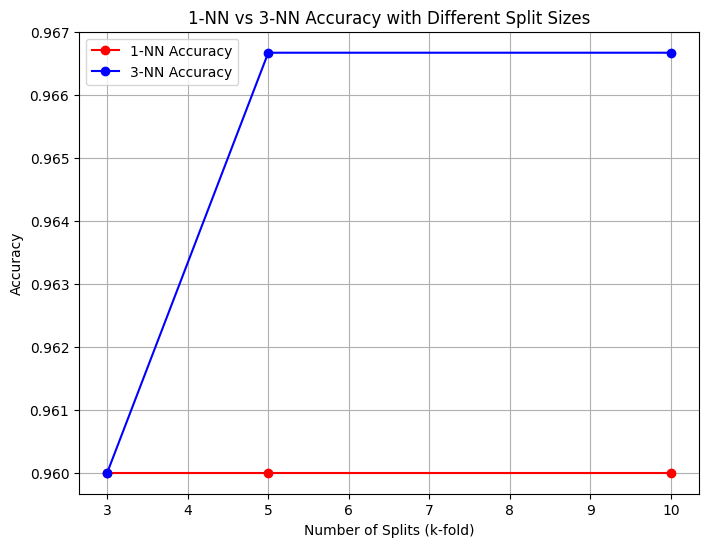

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load dataset (Iris dataset as an example)
data = load_iris()
X, y = data.data, data.target

# Create 1-NN and 3-NN classifiers
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)

# Let's try with different numbers of splits (k-folds)
folds = [3, 5, 10]  # Different split sizes
scores_1NN = []
scores_3NN = []

# Perform cross-validation for each fold size
for fold in folds:
    kf = KFold(n_splits=fold, shuffle=True, random_state=42)

    # 1-NN cross-validation scores
    score_1 = cross_val_score(knn_1, X, y, cv=kf)
    scores_1NN.append(np.mean(score_1))

    # 3-NN cross-validation scores
    score_3 = cross_val_score(knn_3, X, y, cv=kf)
    scores_3NN.append(np.mean(score_3))

# Plotting  the results
plt.figure(figsize=(8, 6))
plt.plot(folds, scores_1NN, label="1-NN Accuracy", marker='o', color='r')
plt.plot(folds, scores_3NN, label="3-NN Accuracy", marker='o', color='b')
plt.title("1-NN vs 3-NN Accuracy with Different Split Sizes")
plt.xlabel("Number of Splits (k-fold)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from keras.datasets import mnist
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp

rng = np.random.default_rng(seed=42)

In [ ]:
# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# normalizing the data
train_X = train_X / 255 #Usually the range of image pixels is 0-255 0 mean black and 255 mean white high intensity so when we try to divide the value with 255 we get the values in between 0&1 and this simplifies the task of the model and reduces complexicity
test_X = test_X / 255 # if the input values is more the model struggles to find the patterns between them and it is difficult to learn for it
print(train_X.shape)
# subsample from images and labels. Otherwise it will take too long!
train_X = train_X[::1200, :, :].copy() # Considering 1201th,2402th.. images
train_y = train_y[::1200].copy() #Representing the dimensions no.of images,height,width,colour panels..

(60000, 28, 28)


In [ ]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    traindata = traindata.reshape(-1, 28*28)
    testdata = testdata.reshape(-1, 28*28)
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

In [ ]:
testpred = NN(train_X, train_y, test_X)
print("Baseline accuracy without augmentation:",
      Accuracy(test_y, testpred)*100, "%")

Baseline accuracy without augmentation: 64.72 %


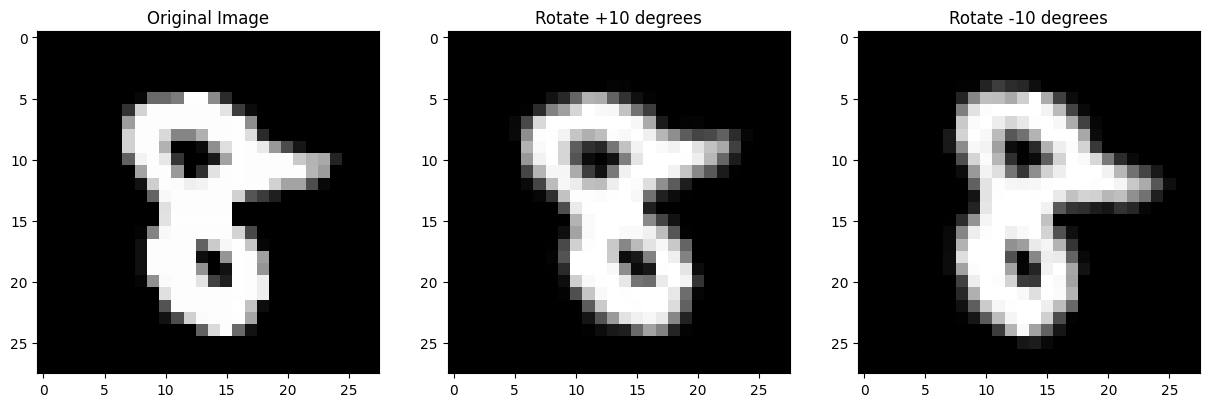

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(train_X[2], cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(rotate(train_X[2], 10), cmap="gray")
axs[1].set_title("Rotate +10 degrees")

axs[2].imshow(rotate(train_X[2], -10), cmap="gray")
axs[2].set_title("Rotate -10 degrees")

plt.show()

In [ ]:
def augRotate(sample, angleconstraint):
    """
    This function takes in a sample and an angle constraint and returns the augmented sample
    by rotating the sample by a random angle within the angle constraint

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    angleconstraint: the maximum angle by which the sample can be rotated

    returns: the augmented sample which is the input sample rotated by a random angle within the angle constraint
    """
    if angleconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        # make sure the sample is 3 dimensional
        sample = np.expand_dims(sample, 0)
    angle = rng.random(len(sample))  # generate random numbers for angles
    # make the random angle constrained
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = rotate(sample[ii], angle[ii])
    return np.squeeze(nsample)  # take care if the input had only one sample.

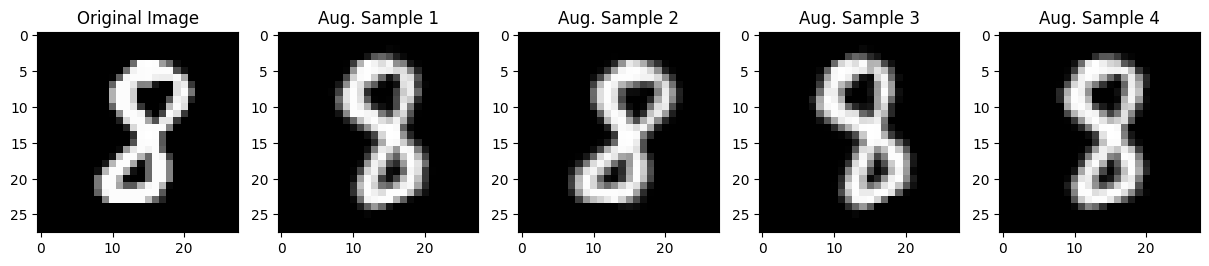

In [ ]:
sample = train_X[20]
angleconstraint = 70

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[1].set_title("Aug. Sample 1")

axs[2].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[2].set_title("Aug. Sample 2")

axs[3].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[3].set_title("Aug. Sample 3")

axs[4].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[4].set_title("Aug. Sample 4")

plt.show()

In [ ]:
# hyperparameters
angleconstraint = 60
naugmentations = 5

# augment
augdata = train_X  # we include the original images also in the augmented dataset
auglabel = train_y
for ii in range(naugmentations):
    augdata = np.concatenate(
        (augdata, augRotate(train_X, angleconstraint))
    )  # concatenate the augmented data to the set
    auglabel = np.concatenate(
        (auglabel, train_y)
    )  # the labels don't change when we augment

# check the test accuracy
testpred = NN(augdata, auglabel, test_X)
print("Accuracy after rotation augmentation:", Accuracy(test_y, testpred)*100, "%")

Accuracy after rotation augmentation: 67.66 %


In [ ]:
angleconstraints = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]  # the values we want to test
accuracies = np.zeros(
    len(angleconstraints), dtype=float
)  # we will save the values here

for ii in range(len(angleconstraints)):
    # create the augmented dataset
    augdata = train_X  # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotate(train_X, angleconstraints[ii]))
        )  # concatenate the augmented data to the set
        auglabel = np.concatenate(
            (auglabel, train_y)
        )  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after rotation augmentation constrained by",
        angleconstraints[ii],
        "degrees is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after rotation augmentation constrained by 0 degrees is 64.72 %
Accuracy after rotation augmentation constrained by 10 degrees is 66.79 %
Accuracy after rotation augmentation constrained by 20 degrees is 67.84 %
Accuracy after rotation augmentation constrained by 30 degrees is 68.47 %
Accuracy after rotation augmentation constrained by 40 degrees is 67.63 %
Accuracy after rotation augmentation constrained by 50 degrees is 67.65 %
Accuracy after rotation augmentation constrained by 60 degrees is 65.3 %
Accuracy after rotation augmentation constrained by 70 degrees is 66.06 %
Accuracy after rotation augmentation constrained by 80 degrees is 64.61 %
Accuracy after rotation augmentation constrained by 90 degrees is 64.31 %


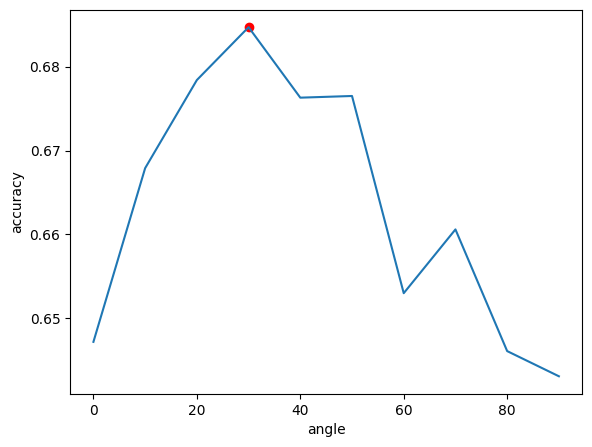

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")

# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c="red")

1) What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?

```
# Answer
```
the best value for angle constraint is 15-30 degrees and for shear constraint is 0.2-0.3 and the acccuracy improved as compared to the code in which augmentation is not being used is 3-4%.


2) Can you increase the accuracy by increasing the number of augmentations from each sample?

```
# Answer
```
A) yes increasing the number of augmentations from each sample can increase the accuracy as the model going to explore the images in different angles,dimensions,shear,rotation beacause of which the ability of model to generalise images increases but if the variations of the given images are too similar or not diverse enough the model will get used to those images and may leads to overfitting.


3) Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?

```
# Answer
```
A) Combining transformations like rotation, shear, brightness adjustment, flipping, and slight zoom gives the model a broader perspective on each image, enhancing its adaptability. Rotation=10-15°,Shear: 0.1-0.15, Brightness/Contrast: given by ±20% to simulate different lighting, Flip: Horizontal, providing a mirrored version,
Zoom: 0.1 to 0.2, for both close-up and distant views.The data set of 500-1000 images is the smallest data set we can consider to get an accuracy above 50.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, accuracy_score

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Select 50 samples per digit from training set
x_train_50, y_train_50 = [], []
for digit in range(10):
    indices = np.where(y_train == digit)[0][:50]  # Get indices of the first 50 occurrences of each digit
    x_train_50.append(x_train[indices])
    y_train_50.append(y_train[indices])

# Concatenate to create new training set of 500 samples (50 per digit)
x_train_50 = np.concatenate(x_train_50, axis=0)
y_train_50 = np.concatenate(y_train_50, axis=0)

# One-hot encode the labels
y_train_50 = to_categorical(y_train_50, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the 50-sample-per-digit training set
model.fit(x_train_50, y_train_50, epochs=10, batch_size=16, validation_data=(x_test, y_test))

# Evaluate on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print performance metrics
print("Accuracy:", accuracy_score(y_true, y_pred_classes))
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 215ms/step - accuracy: 0.3060 - loss: 2.0393 - val_accuracy: 0.6727 - val_loss: 0.9374
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.8021 - loss: 0.6269 - val_accuracy: 0.8387 - val_loss: 0.5203
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 374ms/step - accuracy: 0.9224 - loss: 0.3097 - val_accuracy: 0.8695 - val_loss: 0.3991
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.9503 - loss: 0.2079 - val_accuracy: 0.8776 - val_loss: 0.3982
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 181ms/step - accuracy: 0.9731 - loss: 0.1078 - val_accuracy: 0.8889 - val_loss: 0.3739
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9794 - loss: 0.0865 - val_accuracy: 0.9028 - val_loss: 0.3193
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.9885 - loss: 0.0507 - val_accuracy: 0.9048 - val_loss: 0.3119
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9924 - loss: 0.0309 - val_accuracy